прочитайте статью https://arxiv.org/pdf/1511.08630.pdf

проанализируйте и сделайте препроцессинг на основании вашего анализа и того дизайна экспериментов, который описан в статье, для этого датасета https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Fake.csv')

In [4]:
df.head(2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


из df info видим что нет пропущенных значений

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df.shape

(23481, 4)

удалим дубликаты если они есть

In [6]:
df = df[['text',
         'subject']]

df.drop_duplicates(inplace=True)
df.shape

(22840, 2)

In [7]:
df.head(2)

,text,subject
0,Donald Trump just couldn t wish all Americans ...,News
1,House Intelligence Committee Chairman Devin Nu...,News


уберем строки из пробелов

In [8]:
df['text'] = df['text'].str.strip()


In [9]:
df = df[df['text'].str.len() != 0]

In [10]:
df.shape

(22834, 2)

препроцессинг в статье: For text preprocessing, we only convert all characters in the dataset to lower case

я еще уберу пунктуацию и токены-пустые строки

In [11]:
from string import punctuation

In [12]:
def preprocess(text):
    tokens = text.lower().split()
    tokens = [token.strip(punctuation) for token in tokens if token.strip(punctuation)]
    return ' '.join(tokens)

In [13]:
df['preproc'] = df['text'].apply(preprocess)

In [14]:
df.head()

,text,subject,preproc
0,Donald Trump just couldn t wish all Americans ...,News,donald trump just couldn t wish all americans ...
1,House Intelligence Committee Chairman Devin Nu...,News,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",News,on friday it was revealed that former milwauke...
3,"On Christmas day, Donald Trump announced that ...",News,on christmas day donald trump announced that h...
4,Pope Francis used his annual Christmas Day mes...,News,pope francis used his annual christmas day mes...


распределение длин текстов

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def spl(text):
  return text.split()

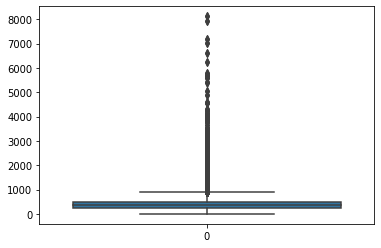

In [ ]:
ax = sns.boxplot(data=df['preproc'].apply(spl).str.len())

In [ ]:
df['preproc'].apply(spl).str.len().describe()

count    22834.000000
mean       434.283919
std        407.115917
min          1.000000
25%        254.000000
50%        369.000000
75%        510.000000
max       8122.000000
Name: preproc, dtype: float64

паддинг в статье:
все предложения доводятся до максимальной длины предложения в трейновых данных

For a sentence in the test dataset, we pad sentences that are shorter than *maxlen* in the same way, but for sentences that have a length longer than *maxlen*, we simply cut extra words at the end of these sentences to reach *maxlen*.

по графику распределения длин и по статистике из describe видно, что нет смысла паддить до максимальной длины (8122), ведь 75% значений меньше 510

как значение длины для паддинга возьму 1000, на графике это отмечено как максимальная длина, если не считать выбросы

всего 6 разных классов

In [ ]:
df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

### сбалансированые классы?

In [11]:
df['subject'].value_counts()

News               9050
politics           6423
left-news          4303
Government News    1497
US_News             783
Middle-east         778
Name: subject, dtype: int64

## не буду уменьшать датасет

### размер датасета

### 1) сначала я попробовала сбалансировать классы и обрезать датасет - из каждого класса выбрала рандомно 778 примеров (кол-во примеров в самом маленьком клсссе), но на таком количестве данных модель ужасно обучается

In [ ]:
from sklearn.utils import resample

In [ ]:
# cats = list(df['subject'].unique())

In [ ]:
# all_dfs = []

In [ ]:
# for cat in cats:
#   all_dfs.append(df[df['subject'] == cat].sample(n=778, random_state=42))

# newdf = pd.concat(all_dfs, axis=0, ignore_index=True)

In [ ]:
# newdf['subject'].value_counts()

US_News            778
News               778
left-news          778
Government News    778
Middle-east        778
politics           778
Name: subject, dtype: int64

In [ ]:
# newdf.to_csv('/content/gdrive/My Drive/fakenews.csv')

# Задача: предсказать категорию новости 


In [15]:
!pip install torchmetrics

     |████████████████████████████████| 332 kB 5.4 MB/s 


In [16]:
!pip install ipdb

     |████████████████████████████████| 791 kB 5.3 MB/s 
     |████████████████████████████████| 374 kB 43.7 MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.9-py3-none-any.whl size=11648 sha256=a09b3b62d78f8d783c28890bd34355ae3643b1f361dac4982dec0c9ef312d7cf
  Stored in directory: /root/.cache/pip/wheels/65/cd/cc/aaf92acae337a28fdd2aa4d632196a59745c8c39f76eaeed01
Successfully built ipdb
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 

In [17]:
import numpy as np
from string import punctuation
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
# from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim
from torchmetrics import F1
from torchmetrics.functional import f1, recall, accuracy
import ipdb

In [18]:
vocab = Counter() # для ВСЕХ ДАННЫХ

for text in df['preproc']:
    vocab.update(text.split())
print('всего уникальных токенов:', len(vocab))

всего уникальных токенов: 194941


In [19]:
filtered_vocab = set()

for word in vocab:
    if vocab[word] > 2:
        filtered_vocab.add(word)
print('уникальных токенов, втретившихся больше 2 раз:', len(filtered_vocab))

уникальных токенов, втретившихся больше 2 раз: 59975


In [20]:
#создаем словарь с индексами word2id, для спецсимвола паддинга дефолтный индекс - 0
word2id = {'PAD':0}

for word in filtered_vocab:
    word2id[word] = len(word2id)

идея статьи

we stack CNN and standard LSTM in a unified architecture for semantic sentence modeling.

we apply CNN to text data and feed consecutive window features directly to LSTM, and so our architecture enables LSTM to learn long-range dependencies from higher-order sequential features.

We choose sequence-based input other than relying on the syntactic parse trees before feeding in the neural network, thus our model doesn’t rely on any external language knowledge and complicated pre-processing.

### векторы из статьи GoogleNews-vectors-negative300

*  We initialize word vectors with the publicly avail- able word2vec vectors1 that are pre-trained using about 100B words from the Google News Dataset. The dimensionality of the word vectors is 300. We also initialize the word vector for the unknown words from the uniform distribution [-0.25, 0.25]. We then fine-tune the word vectors along with other model parameters during training.

In [ ]:
!pip install tqdm
from tqdm import tqdm

In [21]:
len(word2id) # всего слов для которых. нужны эмбеддинги

59976

We also initialize the word vector for the unknown words from the uniform distribution [-0.25, 0.25].

добавляю вектора для незнакомых слов и собираю все в 1 матрицу

In [22]:
from gensim.models import KeyedVectors

In [23]:
! wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-12-29 19:38:38--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 3.5.20.187
Connecting to s3.amazonaws.com (s3.amazonaws.com)|3.5.20.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  72.7MB/s    in 24s     

2021-12-29 19:39:02 (66.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [24]:
! gzip -d GoogleNews-vectors-negative300.bin.gz

In [25]:
! ls -a

.  ..  .config	gdrive	GoogleNews-vectors-negative300.bin  sample_data


In [26]:
w2v = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

принтится кол-во незнакомых слов для модели

In [27]:
weights = np.zeros((len(word2id), 300))
unk = 0
for word, i in word2id.items():
    try:
        weights[i] = w2v[word]
    except KeyError:
        unk += 1
        weights[i] = np.random.uniform(-0.25, 0.25, 300)
print(unk)
weights = torch.FloatTensor(weights)

27390


In [28]:
weights.shape

torch.Size([59976, 300])

In [29]:
cat_mapper = {cat: n for n, cat in enumerate(df.subject.unique())}

In [30]:
cat_mapper

{'Government News': 2,
 'Middle-east': 5,
 'News': 0,
 'US_News': 4,
 'left-news': 3,
 'politics': 1}

In [31]:
df.subject = df.subject.map(cat_mapper)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22834 entries, 0 to 23480
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     22834 non-null  object
 1   subject  22834 non-null  int64 
 2   preproc  22834 non-null  object
dtypes: int64(1), object(2)
memory usage: 713.6+ KB


padding - как уже писала выше возьму maxlen из всех предложений, но без учета выбросов = 1000

In [33]:
class NewsDataset(Dataset):

    def __init__(self, dataset, target, word2id, DEVICE, sequence_length=1000, pad_token='PAD'):
        self.dataset = dataset.values
        self.word2id = word2id
        self.length = dataset.shape[0]
        self.target = target.values
        self.device = DEVICE
        self.sequence_length = sequence_length
        self.pad_token = pad_token
        self.pad_index = self.word2id[self.pad_token]

    def __len__(self):
        return self.length

    def __getitem__(self, index): 
        # sentence = self.x_data[index]
        sentence = self.dataset[index]
        # просто выбрасываем наши неизветсные слова
        ids = torch.LongTensor([self.word2id[word] for word in sentence if word in self.word2id])
        y = [self.target[index]]
        y = torch.Tensor(y).to(self.device)
        return ids, y
    
    def process_text(text):
        words = text.split()
        return words
    
    def padding(self, sequence):
        # Ограничить длину self.sequence_length
        # если длина меньше максимально - западить
        if len(sequence)< self.sequence_length:
          add_pad = self.sequence_length - len(sequence)
          
          return list(sequence)+[self.pad_index]*add_pad
        else:
          return list(sequence[:self.sequence_length])

    def collate_fn(self, batch):
      ids, y = list(zip(*batch))
      padded_ids = []
      for sent in ids:
          temp = torch.Tensor(self.padding(sent)).long() # tensor(25558., 7024.)
          padded_ids.append(temp)
      
      padded_ids = torch.vstack(padded_ids).to(self.device)
      y = torch.Tensor(y).long().to(self.device)
      return padded_ids, y

In [34]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [35]:
x_train, x_validation, y_train, y_validation = train_test_split(df.preproc, df.subject, test_size=0.1, random_state=42)


In [36]:
from torch.utils.data import RandomSampler, SequentialSampler

loaders

In [37]:
train_dataset = NewsDataset(x_train, y_train, word2id, device)
train_sampler = RandomSampler(train_dataset)
train_loader = DataLoader(train_dataset, collate_fn=train_dataset.collate_fn, sampler=train_sampler, batch_size=64)

validation_dataset = NewsDataset(x_validation, y_validation, word2id, device)
val_sampler = SequentialSampler(validation_dataset)
validation_loader = DataLoader(validation_dataset, collate_fn=validation_dataset.collate_fn, sampler=val_sampler, batch_size=64)

3) реализуйте на pytorch ту архитектуру модели, которую в итоге тестировали авторы (подробное описание есть в статье), таким образом, чтобы это был пайплайн для проведения экспериментов: можно было запускать модель с разными гиперпараметрами, разными способами регуляризации, описанными в статье (в том числе, чтобы можно было вставлять ее в разных местах), паддингом, векторизацией.


For text classification, we regard the output of the
hidden state at the last time step of LSTM as the
document representation and we add a softmax layer
on top.

We then fine-tune the word vectors along with other model parameters during training.

since the number of windows generated from each convolution layer varies when the filter length varies, we cut the window sequence at the end based on the maximum filter length that gives the shortest number of win- dows. Each window is represented as the concatena- tion of outputs from different convolutional layers. We also exploit different combinations of different filter lengths.

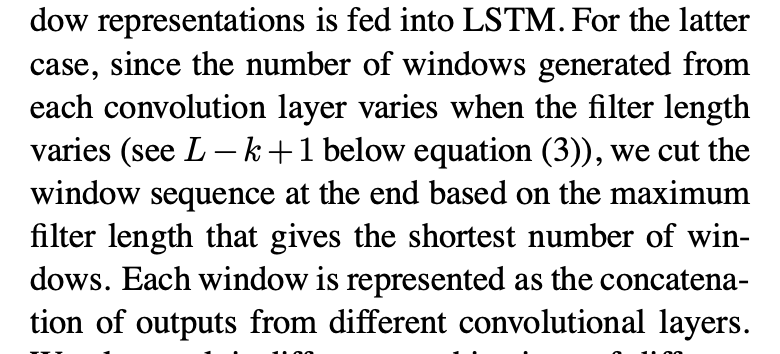

In [38]:
class CLSTM(nn.Module):
    
    def __init__(self, matrix_w, kernels=[3], classes_num=6, sequence_length=1000, embedding_dim=300, num_filters=150, memory_dim=150, dropout_input=True, dropout_output=False, dropout_p=0.5):
        super().__init__()

        self.dropout_input = dropout_input
        self.dropout_output = dropout_output

        # какая то сложная идея в статье, что надо после сверток обрезать по минимальной получившейся длине последовательности
        # я не очень поняла зачем, если можно сделать padding='same' и никаких проблем
        self.max_window = sequence_length - int(max(kernels)) + 1

        #  If freeze = True, the tensor does not get updated in the learning process. 
        # в статье авторы дообучают
        self.embedding = torch.nn.Embedding.from_pretrained(torch.Tensor(matrix_w), freeze=False, padding_idx=0)

        self.convs = nn.ModuleList([torch.nn.Conv1d(in_channels=embedding_dim, 
                                                      out_channels=num_filters, 
                                                      kernel_size=size) for size in kernels])
        

        self.LSTM = torch.nn.LSTM(input_size=num_filters*len(kernels),
                            hidden_size=memory_dim,
                            batch_first=True)

        self.relu = torch.nn.ReLU()

        self.hidden = torch.nn.Linear(in_features=memory_dim, out_features=classes_num)

        self.dropout = torch.nn.Dropout(p=dropout_p)

        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, word):

        embedded = self.embedding(word)
        #batch_size x seq_len x embedding_dim

        embedded = embedded.transpose(1,2)
        #batch_size x embedding_dim x seq_len

        # to word vectors before feeding the sequence of words into the convolutional layer
        if self.dropout_input:
            embedded = self.dropout(embedded)

        
        feature_maps = [self.relu(conv(embedded)[:, :, :self.max_window]) for conv in self.convs]
        #batch_size x filter_count_i x seq_len each feature map

        concat = torch.cat(feature_maps, 1)
        #batch_size x filter_count1+...+filter_countN x seq_len

        concat = concat.transpose(1,2)

        # For text classification, we regard the output of the
        # hidden state at the last time step of LSTM as the
        # document representation and we add a softmax layer
        # on top
        _, (hn, _) = self.LSTM(concat)

        # to the output of LSTM before the softmax layer
        if self.dropout_output:
            hn = self.dropout(hn)
        #num of layers x batch_size x memory_dim
        hn = torch.squeeze(hn, 0) # убираю num of layers
        # batch_size x memory_dim

        # linear layer(so to get number of classes) and softmax
        logits = self.hidden(hn)
        logits = self.softmax(logits)     
        return logits

* cross-entropy error

* We employ stochas- tic gradient descent (SGD) to learn the model parameters and adopt the optimizer RM- Sprop

In [39]:
from torchmetrics import F1
from torchmetrics.functional import f1, recall
from torchmetrics.functional import precision, accuracy

# train

In [40]:
def train(model, iterator, optimizer, criterion, DEVICE=device):
    epoch_loss = 0 # для подсчета среднего лосса на всех батчах

    model.train()  # ставим модель в обучение, явно указываем, что сейчас надо будет хранить градиенты у всех весов

    for i, (texts, ys) in enumerate(iterator): #итерируемся по батчам
        optimizer.zero_grad()  #обнуляем градиенты
        
        preds = model(texts.to(DEVICE))
        
        loss = criterion(preds, ys.to(DEVICE)) #считаем значение функции потерь  
        loss.backward() #считаем градиенты  
        optimizer.step() #обновляем веса 
        epoch_loss += loss.item() #сохраняем значение функции потерь
        if not (i + 1) % int(len(iterator)/5):
            print(f'Train loss: {epoch_loss/i}')
    return  model, epoch_loss / len(iterator) # возвращаем среднее значение лосса по всей выборке

In [41]:
def evaluate(model, iterator, criterion, DEVICE=device):
    epoch_loss = []
    epoch_metric = []
    # acc = []
        
    model.eval() 
    with torch.no_grad():
        for i, (texts, ys) in enumerate(iterator):  
            
            preds = model(texts.to(DEVICE))
            
            loss = criterion(preds, ys.to(DEVICE))
            epoch_loss.append(loss.item())
            
            # # f1
            # batch_metric = f1(preds.argmax(1).long(), ys.long()) #  ignore_index=0
            # epoch_metric.append(batch_metric.cpu().numpy())

            # accuracy
            batch_metric = accuracy(preds.argmax(1).long(), ys.long(), average='weighted', num_classes=6)
            epoch_metric.append(batch_metric.cpu().numpy())

    return model, np.mean(epoch_metric), np.mean(epoch_loss) # возвращаем среднее значение по всей выборке

In [42]:
def train_epochs(model, train_iterator, val_iterator, optimizer, criterion, num_epochs=5, DEVICE=device):
    losses = []
    losses_eval = []
    f1s = []
    f1s_eval = []

    for i in range(num_epochs):
        print(f'\nstarting Epoch {i}')
        model, epoch_loss = train(model, train_iterator, optimizer, criterion, DEVICE)
        losses.append(epoch_loss)
        print('\nEvaluating on train...')

        # print(evaluate(model, train_iterator, criterion))
        _, f1_on_train, _ = evaluate(model, train_iterator, criterion, DEVICE)
        f1s.append(f1_on_train)

        print('\nEvaluating on test...')
        _, f1_on_test, epoch_loss_on_test = evaluate(model, val_iterator, criterion, DEVICE)
        losses_eval.append(epoch_loss_on_test)
        f1s_eval.append(f1_on_test)
    
    return losses, losses_eval, f1s, f1s_eval

метрика у меня как у авторов статьи - акураси

In [43]:
import matplotlib.pyplot as plt

def make_graphs(losses, losses_eval, 
                f1s, f1s_eval):

  plt.plot(losses)
  plt.plot(losses_eval)
  plt.title('BCE loss value')
  plt.ylabel('BCE loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

  plt.plot(f1s)
  plt.plot(f1s_eval)
  plt.title('metric value')
  plt.ylabel('metric value')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.show()

In [44]:
def add_to_table(losses_eval, f1s_eval, all_dfs):
    """
    add mean metrics from last 2 epochs on test to summary table
    """

    all_metrics = []

    stroka = {}
    stroka['losses'] = np.mean(losses_eval[-2:])
    stroka['metric'] = np.mean(f1s_eval[-2:])
    all_metrics.append(stroka) # list of dicts

    all_dfs.append(pd.DataFrame(all_metrics))

In [45]:
def pipeline(weights=weights, 
             num_epochs=3, 
             train_loader=train_loader, 
             validation_loader=validation_loader, 
             lr=0.001,
             alldf=None,
             **params): # **params is for CLSTM params

    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    if params:
        print("received model params", params)
        model = CLSTM(weights, **params)
    else:
        model = CLSTM(weights)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.RMSprop(params=model.parameters(), weight_decay=0.0001, lr=lr) # RMSprop with L2 regularization
    model = model.to(device)
    criterion = criterion.to(device)

    num_epochs = num_epochs
    
    print("train_epochs")
    losses, losses_eval, f1s, f1s_eval = train_epochs(model,
                                                      train_loader, 
                                                      validation_loader, 
                                                      optimizer,
                                                      criterion,
                                                      num_epochs,
                                                      DEVICE=device)
    print("make_graphs")
    make_graphs(losses, losses_eval, f1s, f1s_eval)

    if alldf:
        print("add metrics to table")
        add_to_table(losses_eval, f1s_eval, alldf)

    return alldf, model


4) поставьте эксперименты с разными параметрами и особенностями архитектуры (регуляризация, паддинг, векторизация, драпаут и тд, в статье подробно описан смысл этих операций и что конкретно делали, загуглите как это имплементировано в торче) так как описано в статье (там есть подробное описание в разделе 5.2 Experimental Settings ) 


### регуляризация

как ведет себя модель с дропаутами в разных местах. в статье описаны 2 варианта его расположения

For regularization, we employ two commonly used techniques: dropout and L2 weight regularization.


We  add L2 regularization with a factor of 0.001 to the weights in the softmax layer for both tasks.

we either apply dropout 
* to word vectors before feeding the sequence of words into the convolutional layer 

* or to the output of LSTM before the softmax layer.

## эксперимент с параметрами модели по умолчанию: 

kernels=[3], 
classes_num=6, 
sequence_length=1000, 
embedding_dim=300, 
num_filters=150, 
memory_dim=150, 
dropout_input=True, 
dropout_output=False, 
dropout_p=0.5

lr 0.001, 5 эпох

train_epochs

starting Epoch 0
Train loss: 1.5862137741512723
Train loss: 1.580365303933151
Train loss: 1.57396484544764
Train loss: 1.5696631076289158
Train loss: 1.5654896333299835

Evaluating on train...

Evaluating on test...

starting Epoch 1
Train loss: 1.5813309181304205
Train loss: 1.5709142450272569
Train loss: 1.5740156822803757
Train loss: 1.567995681482203
Train loss: 1.5664218260576732

Evaluating on train...

Evaluating on test...

starting Epoch 2
Train loss: 1.593574733961196
Train loss: 1.5791801251764372
Train loss: 1.5699775006758605
Train loss: 1.5687443452722887
Train loss: 1.5638793359355867

Evaluating on train...

Evaluating on test...

starting Epoch 3
Train loss: 1.5832632798997184
Train loss: 1.572482465759037
Train loss: 1.5695828417832938
Train loss: 1.5655773424634747
Train loss: 1.5639965825693734

Evaluating on train...

Evaluating on test...

starting Epoch 4
Train loss: 1.5814602469641066
Train loss: 1.5710407307767493
Train loss: 1.5670306014764996
Tr

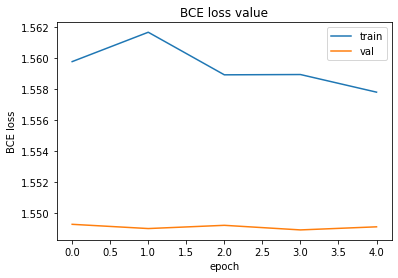

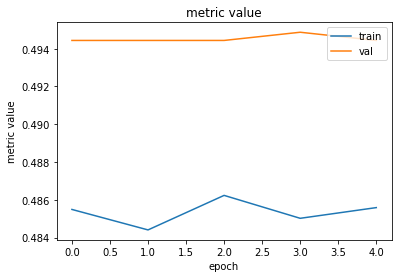

add metrics to table


In [54]:
alldf = [pd.DataFrame({"losses": [], "metric": []})]
alldf, mymodel = pipeline(weights=weights, 
             num_epochs=5, 
             train_loader=train_loader, 
             validation_loader=validation_loader, 
             lr=0.001,
             alldf=alldf)

в таблицу собираю лоссы и метрику на тестовых данных

In [56]:
pd.concat(alldf, axis=0)

,losses,metric
0,1.549009,0.494654


эксперимент с тем же набором параметров, но все дропауты - false

received model params {'kernels': [3], 'classes_num': 6, 'sequence_length': 1000, 'embedding_dim': 300, 'num_filters': 150, 'memory_dim': 150, 'dropout_input': False, 'dropout_output': False, 'dropout_p': 0.5}
train_epochs

starting Epoch 0
Train loss: 1.585067906076946
Train loss: 1.5791684051198283
Train loss: 1.5686013623681991
Train loss: 1.5689249351912853
Train loss: 1.565583103129109

Evaluating on train...

Evaluating on test...

starting Epoch 1
Train loss: 1.612003311278328
Train loss: 1.5848984464885683
Train loss: 1.5756875276565552
Train loss: 1.5734278781741273
Train loss: 1.5704702650865416

Evaluating on train...

Evaluating on test...

starting Epoch 2
Train loss: 1.581195766963656
Train loss: 1.5681647325125265
Train loss: 1.5650520593083965
Train loss: 1.562782123042088
Train loss: 1.5637841295672807

Evaluating on train...

Evaluating on test...

starting Epoch 3
Train loss: 1.579712404145135
Train loss: 1.5990478382335873
Train loss: 1.588717179148609
Train loss: 1

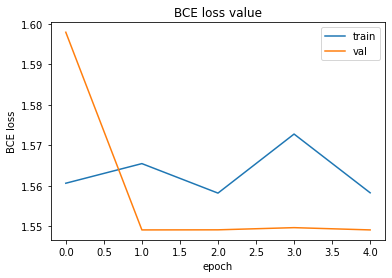

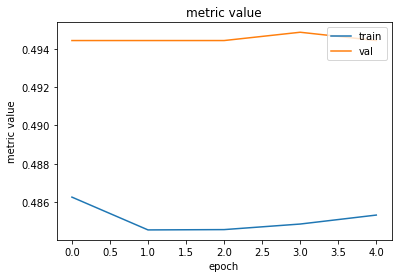

add metrics to table


In [67]:
alldf, mymodel = pipeline(weights=weights, 
             num_epochs=5, 
             train_loader=train_loader, 
             validation_loader=validation_loader, 
             lr=0.001,
             alldf=alldf, 
             kernels=[3], 
             classes_num=6, 
             sequence_length=1000, 
             embedding_dim=300, 
             num_filters=150, 
             memory_dim=150, 
             dropout_input=False, 
             dropout_output=False, 
             dropout_p=0.5)

In [68]:
pd.concat(alldf, axis=0)

,losses,metric
0,1.549009,0.494654
0,1.549375,0.494654


а теперь дропаут применяется только на выходе

In [53]:
alldf = [pd.DataFrame({"losses": [], "metric": []})]

received model params {'kernels': [3], 'classes_num': 6, 'sequence_length': 1000, 'embedding_dim': 300, 'num_filters': 150, 'memory_dim': 150, 'dropout_input': False, 'dropout_output': True, 'dropout_p': 0.5}
train_epochs

starting Epoch 0
Train loss: 1.5861700300186399
Train loss: 1.57365316293371
Train loss: 1.5662923133810154
Train loss: 1.565351500230677
Train loss: 1.5658494207926306

Evaluating on train...

Evaluating on test...

starting Epoch 1
Train loss: 1.601669742947533
Train loss: 1.574943074091213
Train loss: 1.5658179721283039
Train loss: 1.5646943405562757
Train loss: 1.5730496338542352

Evaluating on train...

Evaluating on test...

starting Epoch 2
Train loss: 1.6999542448255751
Train loss: 1.6303956499249916
Train loss: 1.6094208081979402
Train loss: 1.5935567701564115
Train loss: 1.5857513698290882

Evaluating on train...

Evaluating on test...

starting Epoch 3
Train loss: 1.5915312899483576
Train loss: 1.5756073542467253
Train loss: 1.5719821228406816
Train loss: 

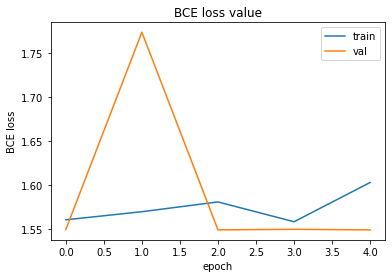

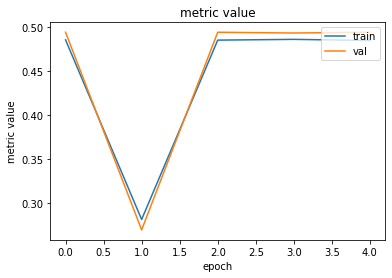

add metrics to table


In [54]:
alldf, mymodel = pipeline(weights=weights, 
             num_epochs=5, 
             train_loader=train_loader, 
             validation_loader=validation_loader, 
             lr=0.001,
             alldf=alldf, 
             kernels=[3], 
             classes_num=6, 
             sequence_length=1000, 
             embedding_dim=300, 
             num_filters=150, 
             memory_dim=150, 
             dropout_input=False, 
             dropout_output=True, 
             dropout_p=0.5)

In [55]:
pd.concat(alldf, axis=0)

,losses,metric
0,1.549402,0.494003


по результатам экспериментов с дропаутом

дропаут только на выходе - худший результат, предыдущие два эксперимента показывают одиннаковое среднее метрики за посл две эпохи

дальше буду делать без дропаута

### different filter size strategies

в Model Analysis показано как меняется accuracy в зависимости от ядра сверточного слоя и комбинации нескольких разных сверток. лучшие результаты показывает архитектуры, в которых:

1) 1 свертка для 3-грамм 

2) 1 свертка для 2-грамм 

3) 1 свертка для 4-грамм


для начала проверю эти 3 случая

теперь сравню разные kernel size. вариант [3] то есть 1 свертка для 3-грамм уже был выше.

эксперимент с размером [2] (1 свертка для 2-грамм)

In [56]:
alldf = [pd.DataFrame({"losses": [], "metric": []})]

received model params {'kernels': [2], 'classes_num': 6, 'sequence_length': 1000, 'embedding_dim': 300, 'num_filters': 150, 'memory_dim': 150, 'dropout_input': False, 'dropout_output': False, 'dropout_p': 0.5}
train_epochs

starting Epoch 0
Train loss: 1.5879551380399675
Train loss: 1.5776337066034631
Train loss: 1.5700872531111951
Train loss: 1.5657626381107406
Train loss: 1.565251539867126

Evaluating on train...

Evaluating on test...

starting Epoch 1
Train loss: 1.5901587539248996
Train loss: 1.5681264569440225
Train loss: 1.5691341224141147
Train loss: 1.5767890532811484
Train loss: 1.5740996700095533

Evaluating on train...

Evaluating on test...

starting Epoch 2
Train loss: 1.5741848283343844
Train loss: 1.5638262577882902
Train loss: 1.56204753209159
Train loss: 1.5652513162762511
Train loss: 1.5634494900329734

Evaluating on train...

Evaluating on test...

starting Epoch 3
Train loss: 1.5751081383417522
Train loss: 1.5622905192412728
Train loss: 1.5644075464827851
Train los

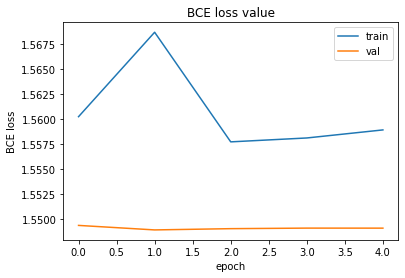

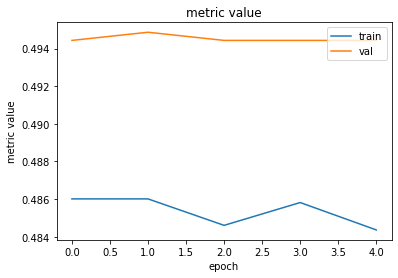

add metrics to table


In [57]:
alldf, mymodel = pipeline(weights=weights, 
             num_epochs=5, 
             train_loader=train_loader, 
             validation_loader=validation_loader, 
             lr=0.001,
             alldf=alldf, 
             kernels=[2], 
             classes_num=6, 
             sequence_length=1000, 
             embedding_dim=300, 
             num_filters=150, 
             memory_dim=150, 
             dropout_input=False, 
             dropout_output=False, 
             dropout_p=0.5)

In [58]:
pd.concat(alldf, axis=0)

,losses,metric
0,1.549071,0.494437


1 шт размера 4

In [ ]:
alldf, mymodel = pipeline(weights=weights, 
             num_epochs=5, 
             train_loader=train_loader, 
             validation_loader=validation_loader, 
             lr=0.001,
             alldf=alldf, 
             kernels=[4], 
             classes_num=6, 
             sequence_length=1000, 
             embedding_dim=300, 
             num_filters=150, 
             memory_dim=150, 
             dropout_input=False, 
             dropout_output=False, 
             dropout_p=0.5)

In [ ]:
pd.concat(alldf, axis=0)

2 штуки размера 2 и 3

In [ ]:
alldf, mymodel = pipeline(weights=weights, 
             num_epochs=5, 
             train_loader=train_loader, 
             validation_loader=validation_loader, 
             lr=0.001,
             alldf=alldf, 
             kernels=[2,3], 
             classes_num=6, 
             sequence_length=1000, 
             embedding_dim=300, 
             num_filters=150, 
             memory_dim=150, 
             dropout_input=False, 
             dropout_output=False, 
             dropout_p=0.5)

In [ ]:
pd.concat(alldf, axis=0)

2 штуки, 2 и 4

In [ ]:
alldf, mymodel = pipeline(weights=weights, 
             num_epochs=5, 
             train_loader=train_loader, 
             validation_loader=validation_loader, 
             lr=0.001,
             alldf=alldf, 
             kernels=[2,4], 
             classes_num=6, 
             sequence_length=1000, 
             embedding_dim=300, 
             num_filters=150, 
             memory_dim=150, 
             dropout_input=False, 
             dropout_output=False, 
             dropout_p=0.5)

In [ ]:
pd.concat(alldf, axis=0)

2 штуки, 3 и 4

In [ ]:
alldf, mymodel = pipeline(weights=weights, 
             num_epochs=5, 
             train_loader=train_loader, 
             validation_loader=validation_loader, 
             lr=0.001,
             alldf=alldf, 
             kernels=[3,4], 
             classes_num=6, 
             sequence_length=1000, 
             embedding_dim=300, 
             num_filters=150, 
             memory_dim=150, 
             dropout_input=False, 
             dropout_output=False, 
             dropout_p=0.5)

In [ ]:
pd.concat(alldf, axis=0)

c большим lr  лосс вырождается в nan

In [ ]:
alldf = []
alldf, mymodel = pipeline(weights=weights, 
             num_epochs=6, 
             train_loader=train_loader, 
             validation_loader=validation_loader, 
             lr=0.01,
             alldf=alldf)

train_epochs

starting Epoch 0
Train loss: 1.6059787651849171
Train loss: 1.5852945254543636
Train loss: 1.577269046094405
Train loss: 1.5695957590551937
Train loss: 1.5679320052125985

Evaluating on train...

Evaluating on test...

starting Epoch 1
Train loss: 1.573811616216387
Train loss: 1.5599764791999275
Train loss: 1.5616039206220218
Train loss: 1.5628730614980062
Train loss: 1.5624437492842957

Evaluating on train...

Evaluating on test...

starting Epoch 2
Train loss: 1.570484649567377
Train loss: 1.570126913663909
Train loss: 1.5650500352470038
Train loss: 1.5629818864897185
Train loss: 1.5765532027217661

Evaluating on train...

Evaluating on test...

starting Epoch 3
Train loss: nan
Train loss: nan
Train loss: nan
Train loss: nan
Train loss: nan

Evaluating on train...

Evaluating on test...

starting Epoch 4
Train loss: nan
Train loss: nan


KeyboardInterrupt: ignored